In [2]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns


**Reading the Dataset**

In [38]:
# importing the dataset
data1= pd.read_csv('../input/Mall_Customers.csv')
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
# describing the data

data1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# checking if there is any NULL data

data1.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## Data Visualization

First let us see count of people who are shooping based on age groups using Count plot

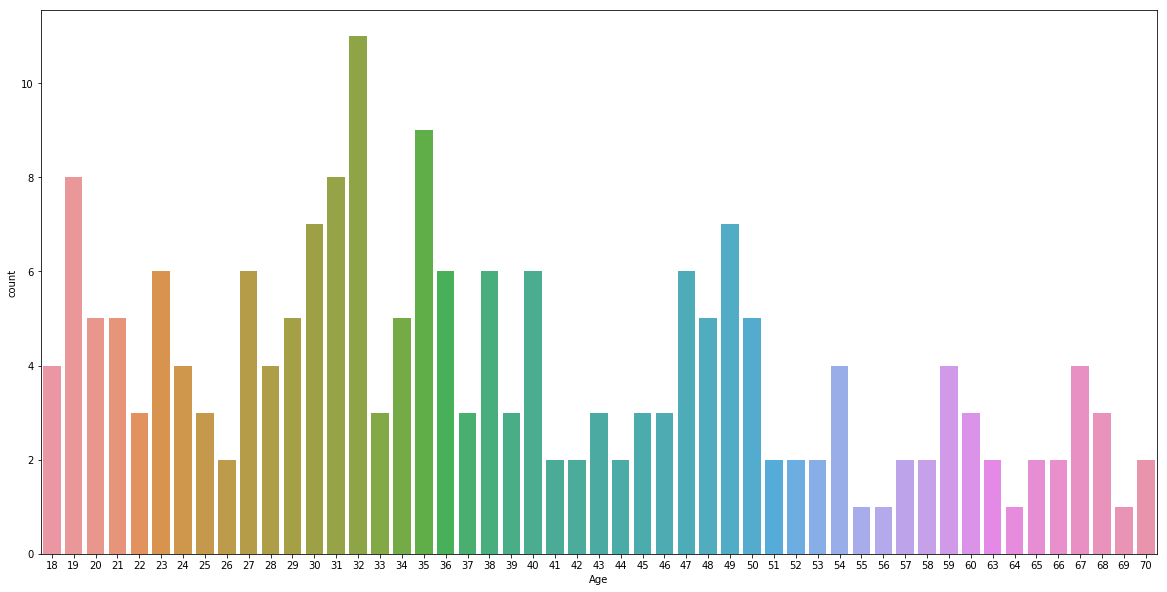

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(data1['Age'])

1.The count is good(>5) in age groups(19-41) except few in that.
2.And the count is porr in age groups (>51).

#seaborns barplots for visualizing important features income,spending

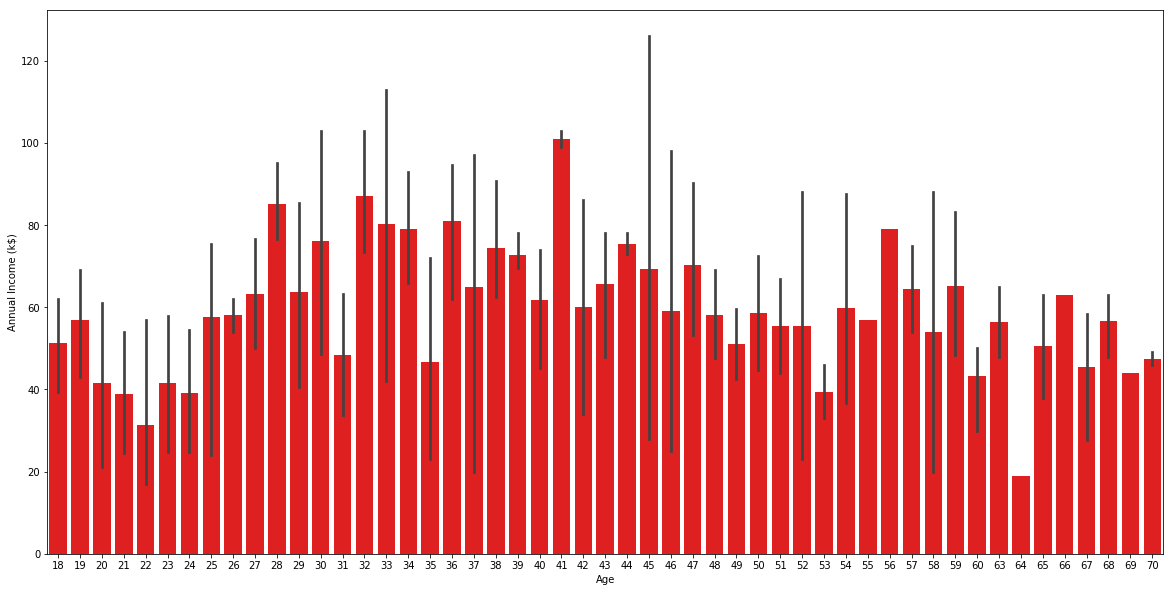

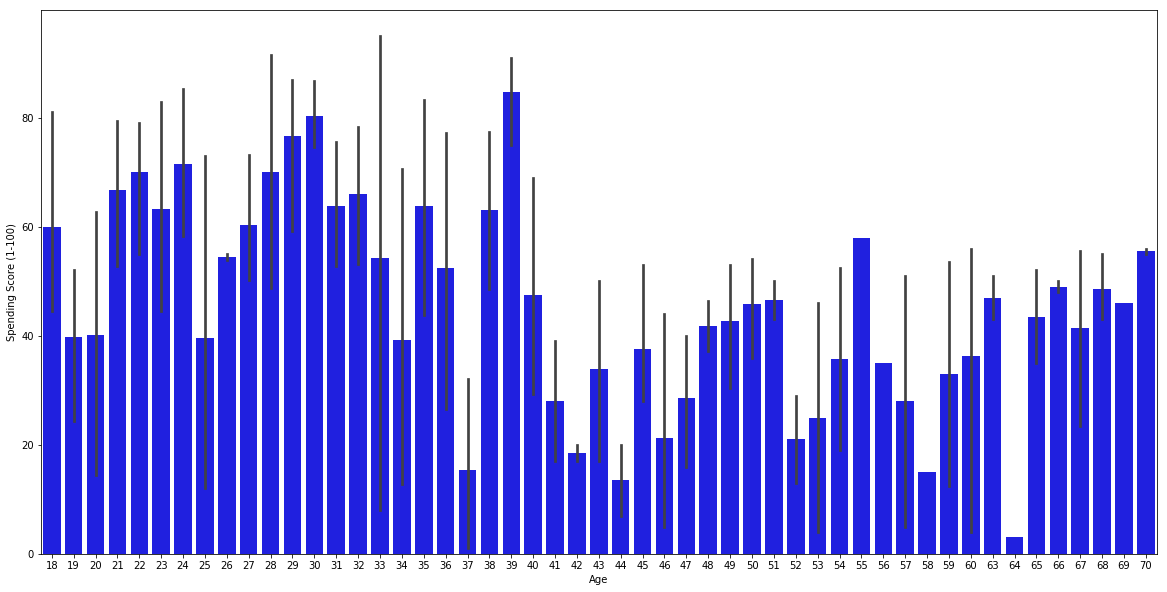

In [14]:
plt.figure(figsize=(20,10))
sns.barplot('Age','Annual Income (k$)',data=data1,color='r')
plt.figure(figsize=(20,10))
sns.barplot('Age','Spending Score (1-100)',data=data1,color='b')

from the above graphs we can infer 
1.from income barplot we can see most of the age groups had more than 50k usdollar income.

2.The least income is around 20k dollars where as heighest is around 120k.

3.From the spending score barplot we can see that spending score is higher from age groups (21-36) age groups.

4.And senior setizens(age>60) has low scoring rate compared to age group (21-36).

#now we will plot the same barplots based on hue factor as gender.

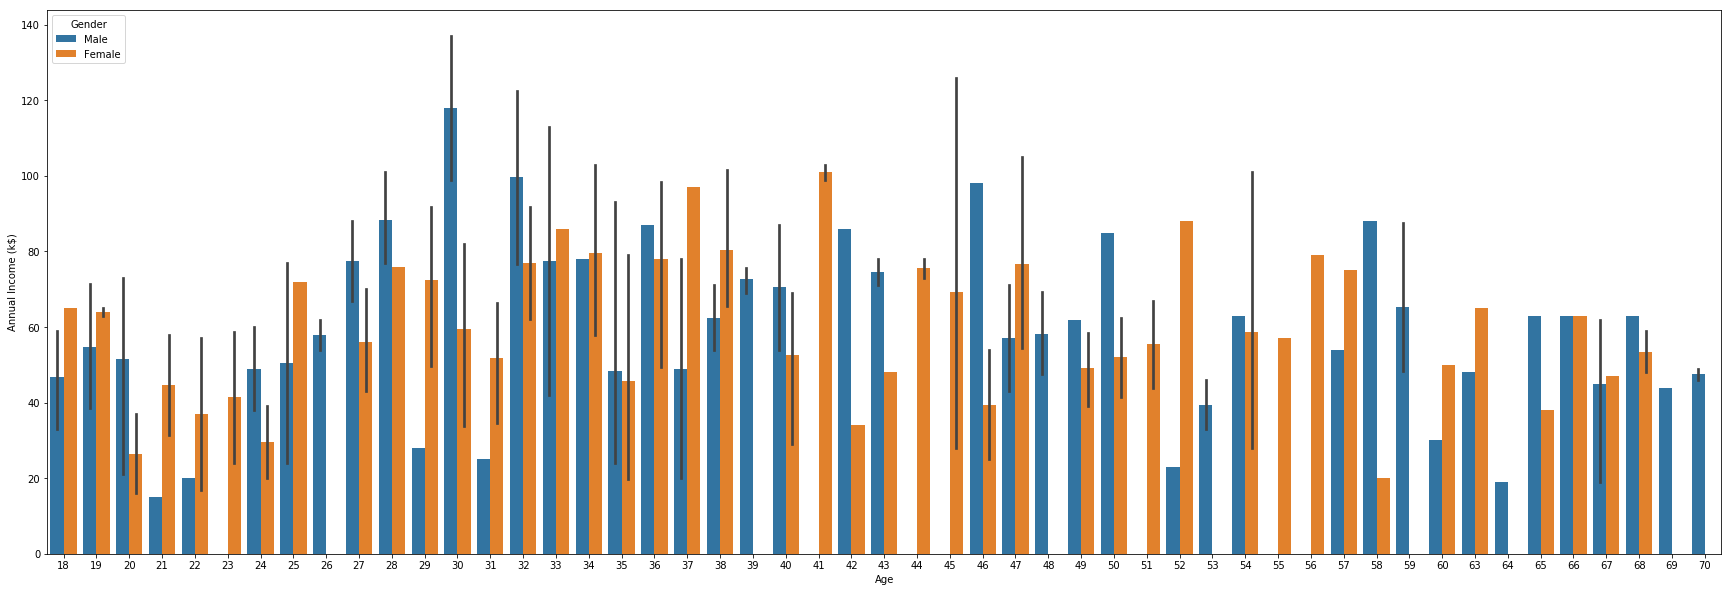

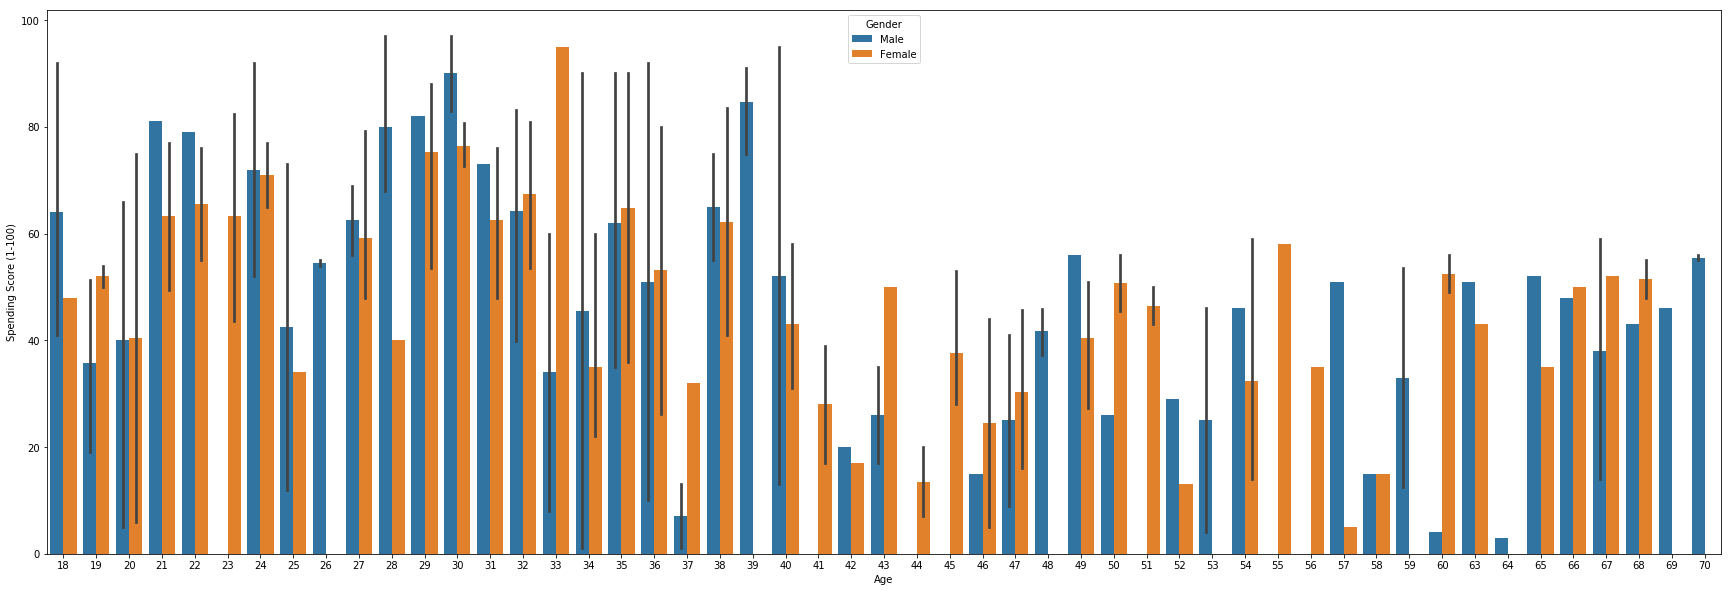

In [21]:
plt.figure(figsize=(30,10))
sns.barplot('Age','Annual Income (k$)',hue='Gender',data=data1)
plt.figure(figsize=(30,10))
sns.barplot('Age','Spending Score (1-100)',hue='Gender',data=data1)

1.from above spending score graph we can see that their is good score(>60) in age groups (29,30,31) from both males and females  .And for the same age groups we see that their income is (medium range).

([<matplotlib.patches.Wedge at 0x7f1442e2ba58>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.00%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.00%')])

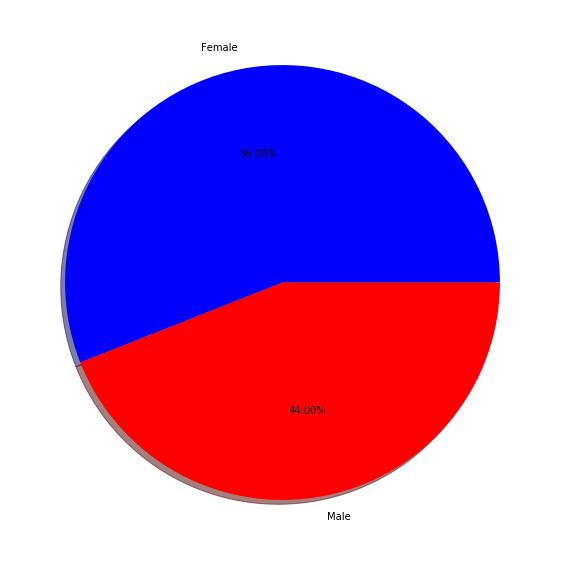

In [33]:
plt.figure(figsize=(10,10))
labels = ['Female', 'Male']
color=['b','r']
pie_vals = data1['Gender'].value_counts()
plt.pie(pie_vals,colors=color, labels = labels, shadow = True, autopct = '%.2f%%')

1.The females had 56% whereas the males have  44%.So there are more females who are shooping compared to males.

In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
data1.drop('CustomerID',axis=1,inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


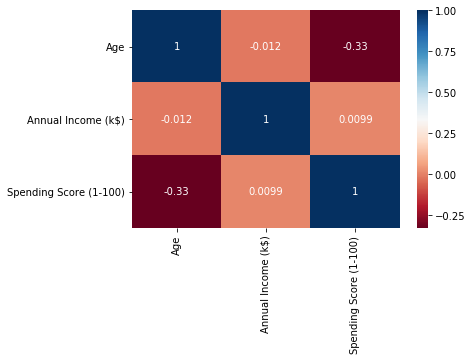

In [47]:
sns.heatmap(data1.corr(),cmap='RdBu',annot=True)

## Clustering Analysis

In [85]:
x_data=data1[['Annual Income (k$)','Spending Score (1-100)']]
x_data.shape

(200, 2)

In [86]:
#let us see the inertia(Inertia is the sum of squared error for each cluster the smaller the inertia the denser the cluster)
from sklearn.cluster import KMeans
res=[]
for i in range(1, 30):
    km = KMeans(n_clusters = i, max_iter = 100)
    km.fit(x_data)
    res.append(km.inertia_)
res

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 24986.52564064288,
 22155.14949036471,
 19636.753964898147,
 17518.643456567686,
 15838.717785514087,
 14293.0390105309,
 12775.343451156685,
 11696.848903289692,
 10944.336267898769,
 10370.574738986503,
 9464.425651541442,
 8615.0864943028,
 8106.311226911914,
 7709.3489010989015,
 7279.409382284382,
 6766.420449725712,
 6471.169001831502,
 6066.259789677128,
 5778.610663021189,
 5546.773672161172,
 5051.586376968442,
 4935.949296128708]

Text(0, 0.5, 'inertia')

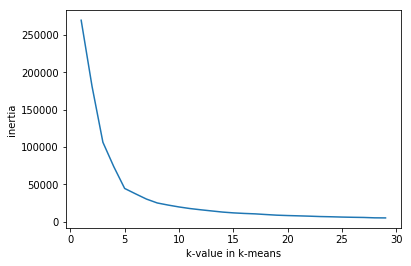

In [87]:
#lets plot the line plot for inertia and k-value.
sns.lineplot(x=range(1,30),y=res)
plt.xlabel('k-value in k-means')
plt.ylabel('inertia')

from above graph the before (k=6) the inertia is rapidly decreaing after (k=5) the graph is inertia is slightly decreasing.So let us choose our no.of clusters=5 

In [97]:
km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 1)
pred = km.fit_predict(x_data)
print(y_means)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [98]:
x_data['means_cluster']=pred
x_data.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Annual Income (k$),Spending Score (1-100),means_cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


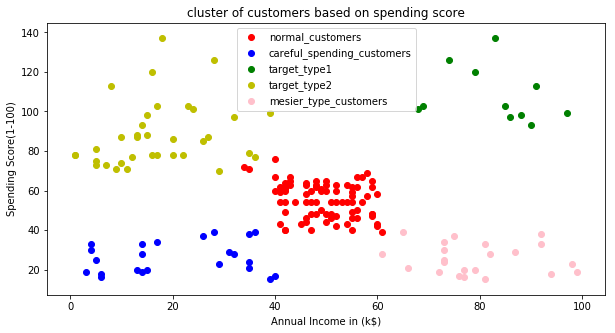

In [104]:
#now we will plot scatter plot (annual_income vs spending _score) and represent our clusters.
plt.figure(figsize=(10,5))
plt.scatter(x_data[x_data['means_cluster']==4]['Spending Score (1-100)'],x_data[x_data['means_cluster']==4]['Annual Income (k$)'],color='r',label='normal_customers')
plt.scatter(x_data[x_data['means_cluster']==3]['Spending Score (1-100)'],x_data[x_data['means_cluster']==3]['Annual Income (k$)'],color='b',label='careful_spending_customers')
plt.scatter(x_data[x_data['means_cluster']==2]['Spending Score (1-100)'],x_data[x_data['means_cluster']==2]['Annual Income (k$)'],color='g',label='target_type1')
plt.scatter(x_data[x_data['means_cluster']==1]['Spending Score (1-100)'],x_data[x_data['means_cluster']==1]['Annual Income (k$)'],color='y',label='target_type2')
plt.scatter(x_data[x_data['means_cluster']==0]['Spending Score (1-100)'],x_data[x_data['means_cluster']==0]['Annual Income (k$)'],color='pink',label='mesier_type_customers')
plt.xlabel('Annual Income in (k$)')
plt.ylabel('Spending Score(1-100)')
plt.title("cluster of customers based on spending score")
plt.legend()

Dendogram for x_data

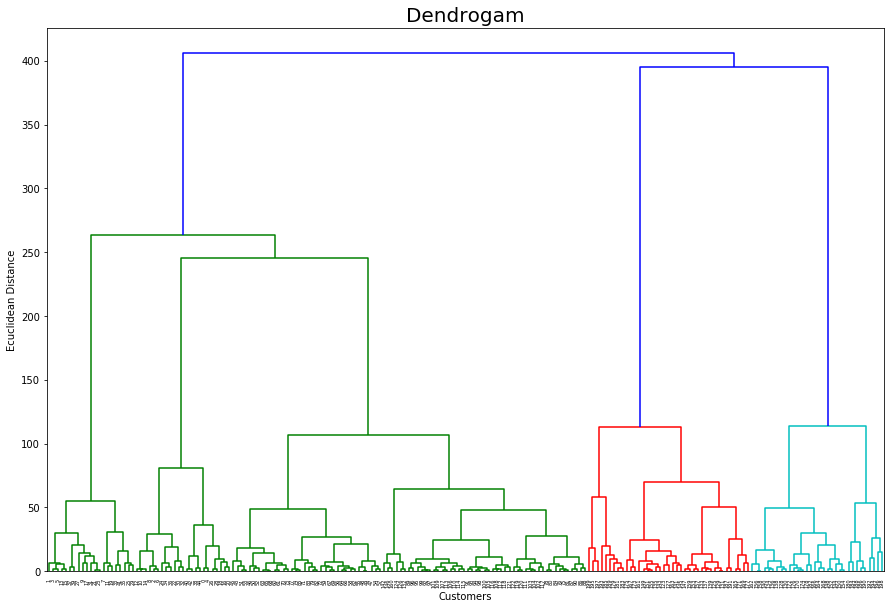

In [107]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(x_data, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

>According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to  optimize the spending scores of the customer in the Mall.